In [36]:
import sympy as smp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [21]:
strategies, payoffs = smp.symbols ("sigma u")

In [22]:
#Following the pytorch video Build Your First PyTorch Model (Linear Regression) (link = https://www.youtube.com/watch?v=QPCFnbonpNQ&t=970s)

In [23]:
x = np.array([x for x in range(100)])

In [24]:
x = x.reshape(-1,1)

In [25]:
y = 46 + 2 * x.flatten()

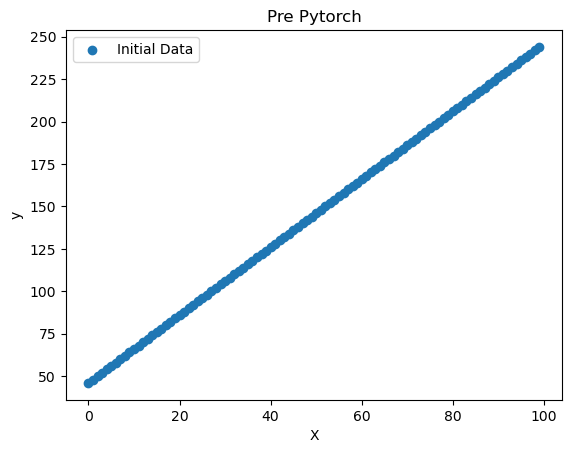

In [26]:
plt.scatter(x, y, label = "Initial Data")
plt.title("Pre Pytorch")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [27]:
x_mean, x_std = x.mean(), x.std()

In [28]:
x_normalized = (x - x_mean) / x_std

In [29]:
x_tensor = torch.tensor(x_normalized, dtype = torch.float32)

In [30]:
y_mean, y_std = y.mean(), y.std()

In [31]:
y_normalized = (y - y_mean) / y_std

In [32]:
y_tensor = torch.tensor(y_normalized, dtype = torch.float32)

In [33]:
class Lin_Regres_Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
    def forward(self, x):
        return self.linear(x).squeeze(1)

In [34]:
model = Lin_Regres_Model(1, 1)

In [60]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 1)

In [61]:
epoch_number = 40

In [64]:
for epoch in range(epoch_number):
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch [{epoch + 1}/{epoch_number}], Loss: {loss.item():.2f}")

Epoch [1/40], Loss: 0.00
Epoch [2/40], Loss: 0.00
Epoch [3/40], Loss: 0.00
Epoch [4/40], Loss: 0.00
Epoch [5/40], Loss: 0.00
Epoch [6/40], Loss: 0.00
Epoch [7/40], Loss: 0.00
Epoch [8/40], Loss: 0.00
Epoch [9/40], Loss: 0.00
Epoch [10/40], Loss: 0.00
Epoch [11/40], Loss: 0.00
Epoch [12/40], Loss: 0.00
Epoch [13/40], Loss: 0.00
Epoch [14/40], Loss: 0.00
Epoch [15/40], Loss: 0.00
Epoch [16/40], Loss: 0.00
Epoch [17/40], Loss: 0.00
Epoch [18/40], Loss: 0.00
Epoch [19/40], Loss: 0.00
Epoch [20/40], Loss: 0.00
Epoch [21/40], Loss: 0.00
Epoch [22/40], Loss: 0.00
Epoch [23/40], Loss: 0.00
Epoch [24/40], Loss: 0.00
Epoch [25/40], Loss: 0.00
Epoch [26/40], Loss: 0.00
Epoch [27/40], Loss: 0.00
Epoch [28/40], Loss: 0.00
Epoch [29/40], Loss: 0.00
Epoch [30/40], Loss: 0.00
Epoch [31/40], Loss: 0.00
Epoch [32/40], Loss: 0.00
Epoch [33/40], Loss: 0.00
Epoch [34/40], Loss: 0.00
Epoch [35/40], Loss: 0.00
Epoch [36/40], Loss: 0.00
Epoch [37/40], Loss: 0.00
Epoch [38/40], Loss: 0.00
Epoch [39/40], Loss: 

In [63]:
new_x = 69420

In [49]:
new_x_normalized = (new_x - x_mean) / x_std

In [51]:
new_x_tensor = torch.tensor(new_x_normalized, dtype = torch.float32).view(1, -1)

In [52]:
model.eval()

Lin_Regres_Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [53]:
with torch.no_grad():
    prediction_normalized = model(new_x_tensor)

In [57]:
prediction_denormalized = prediction_normalized.item() * y_std + y_mean

In [59]:
print(f"Predicted value for x = {new_x}: {prediction_denormalized}; the difference is: {new_x - prediction_denormalized}")

Predicted value for x = 69420: 138885.9882884912; the difference is: -69465.98828849121
